In [1]:
# Importing necessary libraries for EDA 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# For feature engineering
from sklearn.utils import resample

In [2]:
is_test = pd.read_csv("C:/Users/sauga/Desktop/INTERNSHIP/test.csv")

# Exploratory Data Analysis

In [4]:
#Displaying first few rows of our dataset
is_test.head()

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,0,1652817480,0.4306,0.4308,0.4301,0.4301,101150.0,43542.2629,105.0,46109.0,19851.7237
1,1,1652817540,0.4301,0.4303,0.4293,0.4302,275647.0,118478.9689,228.0,91260.0,39217.6312
2,2,1652817600,0.4302,0.4302,0.4292,0.4299,134959.0,57979.2418,156.0,56685.0,24357.5448
3,3,1652817660,0.4299,0.4303,0.4299,0.4301,316209.0,135979.4040,121.0,161740.0,69552.2691
4,4,1652817720,0.4302,0.4307,0.4302,0.4303,107440.0,46243.7993,113.0,31096.0,13384.3384


In [5]:
# Finding the datatype of each columns 
is_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909617 entries, 0 to 909616
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   row_id                  909617 non-null  int64  
 1   timestamp               909617 non-null  int64  
 2   open                    909617 non-null  float64
 3   high                    909617 non-null  float64
 4   low                     909617 non-null  float64
 5   close                   909617 non-null  float64
 6   volume                  909617 non-null  float64
 7   quote_asset_volume      909617 non-null  float64
 8   number_of_trades        909617 non-null  float64
 9   taker_buy_base_volume   909617 non-null  float64
 10  taker_buy_quote_volume  909617 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 76.3 MB


In [6]:
# Identifying missing values in each column
is_test.isnull().sum()

row_id                    0
timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
dtype: int64

In [8]:
# Finding the shape of our dataset
is_test.shape

(909617, 11)

In [10]:
# Checking for duplicated values in our dataset
is_test.duplicated().sum()

0

In [12]:
# Looking for all the columns present in our dataset
print(is_test.columns)

Index(['row_id', 'timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume',
       'taker_buy_quote_volume'],
      dtype='object')


In [13]:
# Convert the timestamp to datetime
is_test['datetime'] = pd.to_datetime(is_test['timestamp'], unit='s')

# Optional: Drop the original timestamp column if no longer needed
is_test.drop('timestamp', axis=1, inplace=True)

is_test.head()

,row_id,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,datetime
0,0,0.4306,0.4308,0.4301,0.4301,101150.0,43542.2629,105.0,46109.0,19851.7237,2022-05-17 19:58:00
1,1,0.4301,0.4303,0.4293,0.4302,275647.0,118478.9689,228.0,91260.0,39217.6312,2022-05-17 19:59:00
2,2,0.4302,0.4302,0.4292,0.4299,134959.0,57979.2418,156.0,56685.0,24357.5448,2022-05-17 20:00:00
3,3,0.4299,0.4303,0.4299,0.4301,316209.0,135979.4040,121.0,161740.0,69552.2691,2022-05-17 20:01:00
4,4,0.4302,0.4307,0.4302,0.4303,107440.0,46243.7993,113.0,31096.0,13384.3384,2022-05-17 20:02:00


In [14]:
# Extract unique years
unique_years = is_test['datetime'].dt.year.unique()

# Print the unique years
print("Unique years in the dataset:", unique_years)

Unique years in the dataset: [2022 2023 2024]


In [15]:
# Get the start and end dates
start_date = is_test['datetime'].min()
end_date = is_test['datetime'].max()

# Print the results
print("Start date of the dataset:", start_date)
print("End date of the dataset:", end_date)

Start date of the dataset: 2022-05-17 19:58:00
End date of the dataset: 2024-02-08 12:14:00


In [17]:
# Looking for columns in our dataset
is_test.columns

Index(['row_id', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume',
       'taker_buy_quote_volume', 'datetime'],
      dtype='object')

In [18]:
# Descriptive Statistics 
is_test.describe()

,row_id,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
count,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,9.096170e+05,9.096170e+05,909617.000000,9.096170e+05,9.096170e+05
mean,454808.000000,0.468089,0.468342,0.467828,0.468102,2.484656e+05,1.187006e+05,149.763820,1.239818e+05,5.920098e+04
std,262583.954242,0.104381,0.104434,0.104319,0.104384,4.606647e+05,2.494472e+05,364.157423,2.343786e+05,1.268206e+05
min,0.000000,0.288400,0.290600,0.287200,0.288400,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,227404.000000,0.379700,0.379900,0.379500,0.379700,7.538700e+04,3.355523e+04,53.000000,3.209500e+04,1.433058e+04
50%,454808.000000,0.466500,0.466800,0.466300,0.466600,1.472370e+05,6.706755e+04,88.000000,6.982900e+04,3.166280e+04
75%,682212.000000,0.521300,0.521500,0.521100,0.521300,2.748180e+05,1.285332e+05,151.000000,1.398770e+05,6.513958e+04
max,909616.000000,0.909000,0.938000,0.899000,0.909100,4.083906e+07,2.218319e+07,48569.000000,2.227382e+07,1.153613e+07


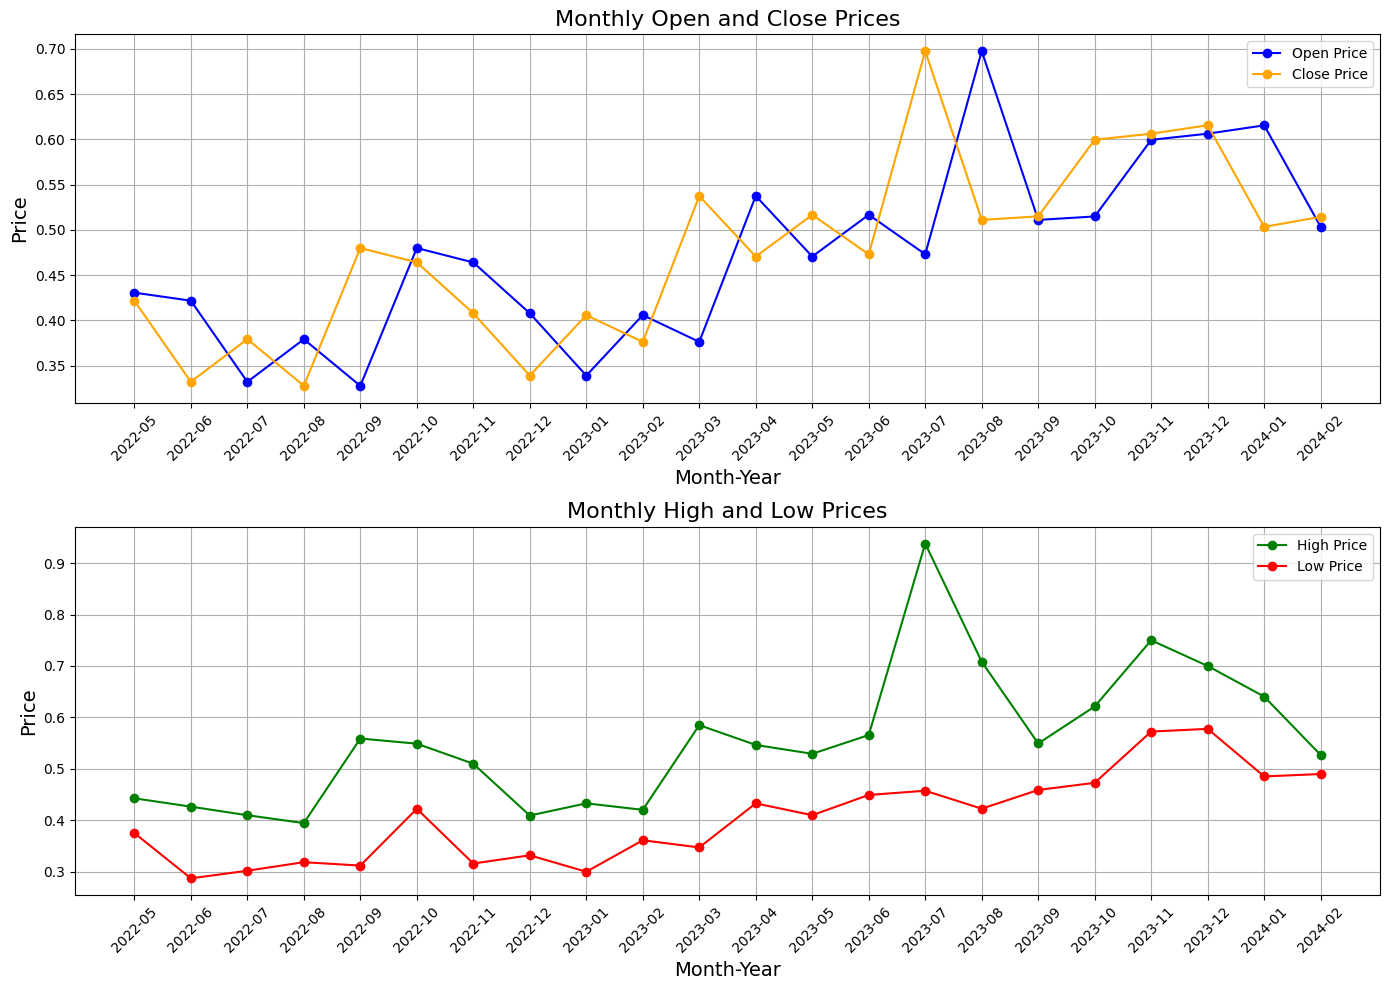

In [19]:

# Ensure 'datetime' is in the correct datetime format
is_test['datetime'] = pd.to_datetime(is_test['datetime'])

# Set 'datetime' as the index to allow time-based resampling
is_test.set_index('datetime', inplace=True)

# Resample data to get the first (open) and last (close) price for each month
monthly_open_close = is_test.resample('M').agg({'open': 'first', 'close': 'last'})

# Reset index to make 'Month-Year' a column for clearer labeling in plots
monthly_open_close.reset_index(inplace=True)

# Create a new column 'Month-Year' for better readability in the plot (e.g., '2023-10')
monthly_open_close['Month-Year'] = monthly_open_close['datetime'].dt.to_period('M')

# Resample data to get the maximum (high) and minimum (low) price for each month
monthly_high_low = is_test.resample('M').agg({'high': 'max', 'low': 'min'})

# Reset index for consistency
monthly_high_low.reset_index(inplace=True)

# Create a 'Month-Year' column in this DataFrame as well
monthly_high_low['Month-Year'] = monthly_high_low['datetime'].dt.to_period('M')

# Plotting the results
plt.figure(figsize=(14, 10))  # Adjusting figure size for better clarity

# Subplot 1: Plotting Monthly Open and Close Prices
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(monthly_open_close['Month-Year'].astype(str), monthly_open_close['open'], marker='o', label='Open Price', color='blue')
plt.plot(monthly_open_close['Month-Year'].astype(str), monthly_open_close['close'], marker='o', label='Close Price', color='orange')
plt.title('Monthly Open and Close Prices', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)  # Rotating x-axis labels for readability
plt.grid(True)  # Adding a grid for better readability
plt.legend()  # Displaying legend

# Subplot 2: Plotting Monthly High and Low Prices
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(monthly_high_low['Month-Year'].astype(str), monthly_high_low['high'], marker='o', label='High Price', color='green')
plt.plot(monthly_high_low['Month-Year'].astype(str), monthly_high_low['low'], marker='o', label='Low Price', color='red')
plt.title('Monthly High and Low Prices', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)  # Adding gridlines
plt.legend()  # Displaying legend

# Adjusting layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

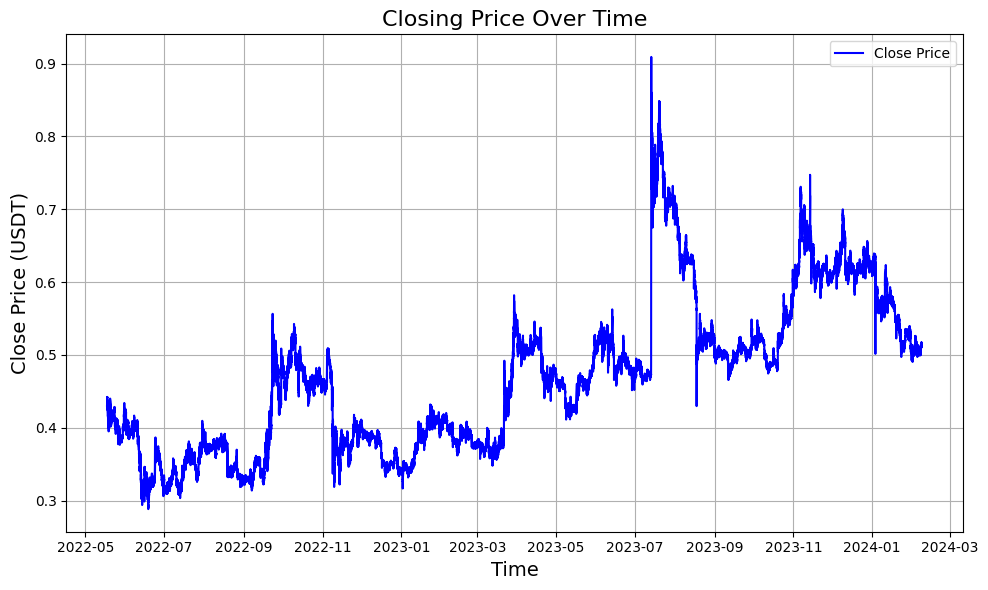

In [20]:
# Plotting the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(is_test.index, is_test['close'], color='blue', label='Close Price')
plt.title('Closing Price Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Close Price (USDT)', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

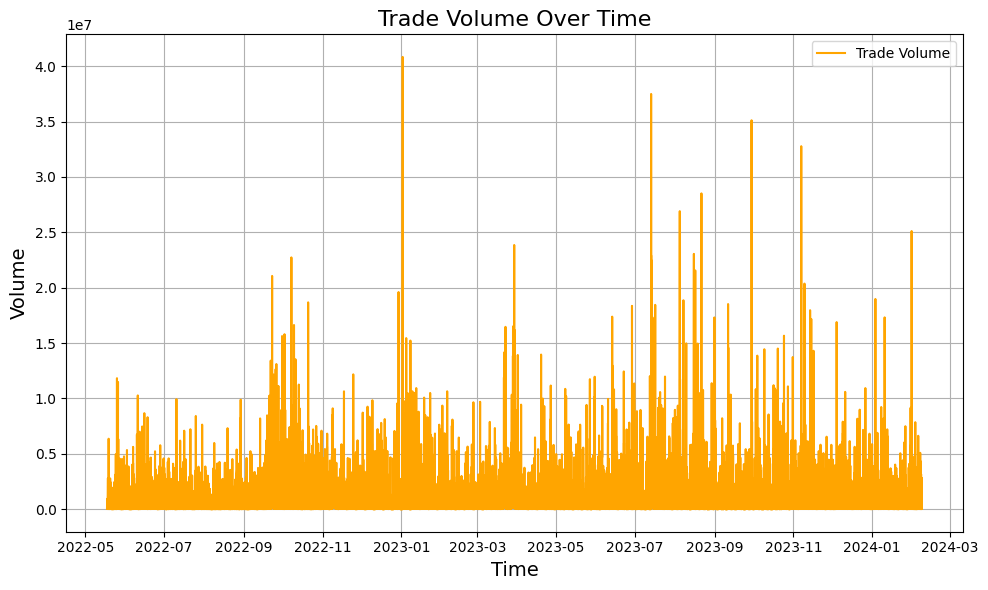

In [21]:

# Plotting the volume of trades over time
plt.figure(figsize=(10, 6))
plt.plot(is_test.index, is_test['volume'], color='orange', label='Trade Volume')
plt.title('Trade Volume Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

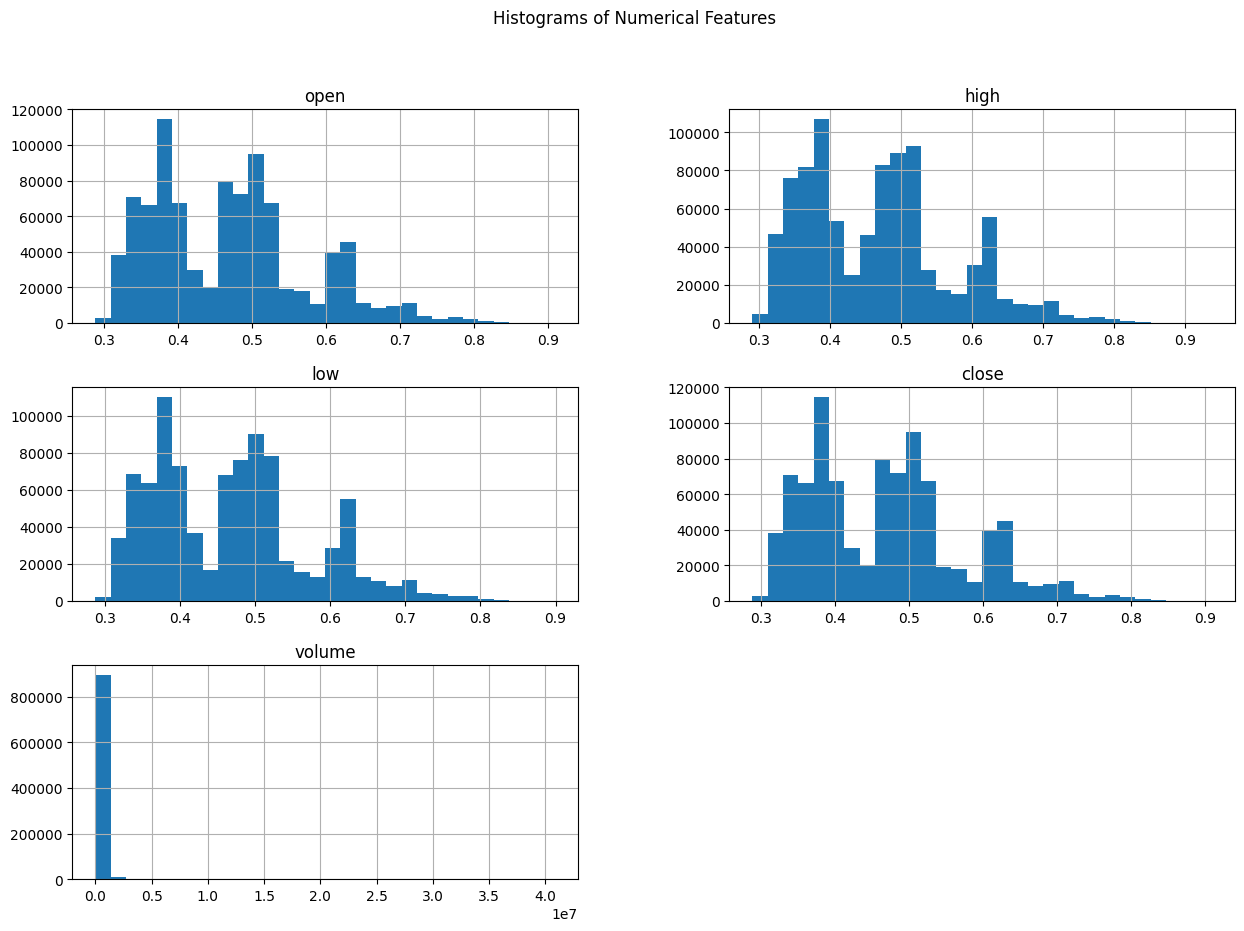

In [22]:
# Histograms of numerical features
is_test[['open', 'high', 'low', 'close', 'volume']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

<Figure size 1400x800 with 0 Axes>

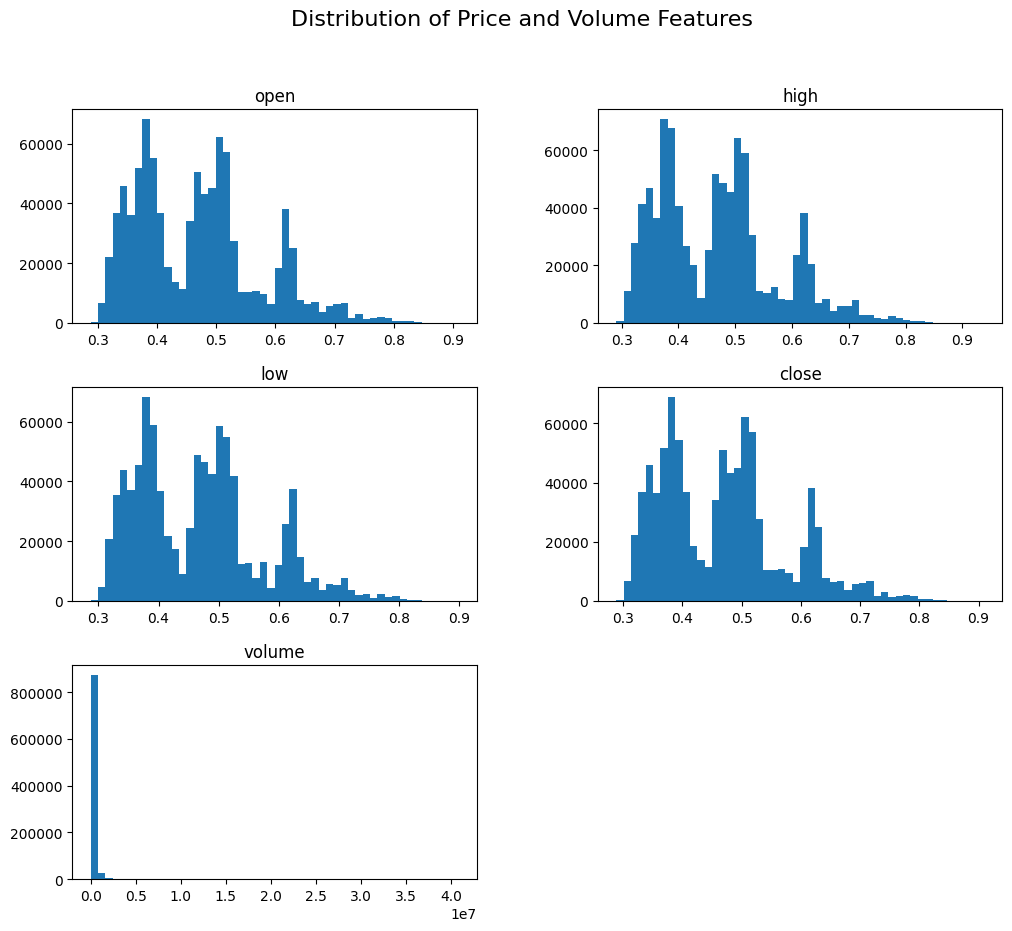

In [23]:
# Distribution analysis
plt.figure(figsize=(14, 8))
is_test[['open', 'high', 'low', 'close', 'volume']].hist(bins=50, figsize=(12, 10), grid=False)
plt.suptitle('Distribution of Price and Volume Features', fontsize=16)
plt.show()

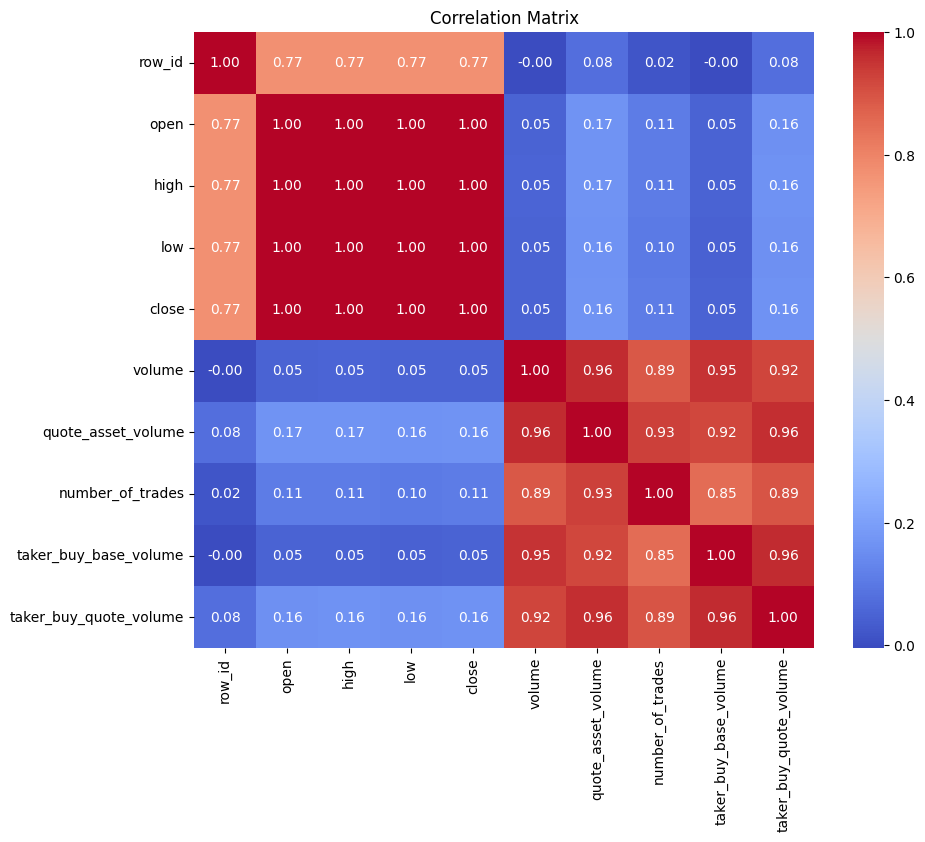

In [25]:
# Correlation matrix
corr_matrix = is_test.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [44]:
is_test.shape

(909617, 10)

# Feature Engineering

In [88]:
# Creating a duplicate of the original Dataframe
is_test_copy = is_test.copy()

,row_id,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,...,lagged_volume_1,lagged_volume_2,is_weekend,is_morning,cumulative_returns,outlier_open_iqr,outlier_high_iqr,outlier_low_iqr,outlier_close_iqr,outlier_volume_iqr
datetime,,,,,,,,,,,,,,,,,,,,,
2022-05-17 20:57:00,59,0.4327,0.4333,0.4325,0.4328,239148.0,103538.5223,225.0,102095.0,44204.8897,...,NaN,NaN,0,0,0.000000,False,False,False,False,False
2022-05-17 20:58:00,60,0.4328,0.4333,0.4322,0.4326,445257.0,192638.3676,316.0,188021.0,81354.6391,...,239148.0,NaN,0,0,-0.000462,False,False,False,False,False
2022-05-17 20:59:00,61,0.4326,0.4328,0.4324,0.4326,332551.0,143856.3734,224.0,185232.0,80135.7275,...,445257.0,239148.0,0,0,-0.000462,False,False,False,False,False
2022-05-17 21:00:00,62,0.4325,0.4326,0.4323,0.4323,208872.0,90325.3360,142.0,110928.0,47974.8720,...,332551.0,445257.0,0,0,-0.001155,False,False,False,False,False
2022-05-17 21:01:00,63,0.4323,0.4328,0.4322,0.4327,124647.0,53904.7021,98.0,69530.0,30072.0565,...,208872.0,332551.0,0,0,-0.000231,False,False,False,False,False


In [89]:
is_test_copy.shape

(909617, 10)

In [90]:
# Drop rows with NaN values resulting from rolling calculations
#is_test_copy.dropna(inplace=True)
is_test_copy.fillna(method='ffill', inplace=True)

In [91]:
is_test.shape

(909617, 10)

# Data Preprocessing

In [92]:
from sklearn.preprocessing import MinMaxScaler

# Lag features: previous close prices
is_test_copy['lag_1'] = is_test_copy['close'].shift(1)
is_test_copy['lag_2'] = is_test_copy['close'].shift(2)

# Rolling statistics: rolling standard deviation
is_test_copy['rolling_std'] = is_test_copy['close'].rolling(window=60).std()

# Volatility indicator: Average True Range (ATR)
is_test_copy['high_low'] = is_test_copy['high'] - is_test_copy['low']
is_test_copy['high_close'] = abs(is_test_copy['high'] - is_test_copy['close'].shift(1))
is_test_copy['low_close'] = abs(is_test_copy['low'] - is_test_copy['close'].shift(1))
is_test_copy['ATR'] = is_test_copy[['high_low', 'high_close', 'low_close']].max(axis=1).rolling(window=60).mean()

# Price Change and Percentage Change
is_test_copy['price_change'] = is_test_copy['close'] - is_test_copy['close'].shift(1)
is_test_copy['pct_change'] = is_test_copy['price_change'] / is_test_copy['close'].shift(1)

# Moving Averages and Exponential Moving Averages
is_test_copy['ma_5'] = is_test_copy['close'].rolling(window=5).mean()
is_test_copy['ma_10'] = is_test_copy['close'].rolling(window=10).mean()
is_test_copy['ma_20'] = is_test_copy['close'].rolling(window=20).mean()
is_test_copy['ema_5'] = is_test_copy['close'].ewm(span=5, adjust=False).mean()
is_test_copy['ema_10'] = is_test_copy['close'].ewm(span=10, adjust=False).mean()

# Volatility and Price Range
is_test_copy['rolling_volatility'] = is_test_copy['close'].rolling(window=60).std()
is_test_copy['price_range'] = is_test_copy['high'] - is_test_copy['low']

# Buy-Sell Volume Ratios and Lagged Volume Features
is_test_copy['buy_volume_ratio'] = is_test_copy['taker_buy_base_volume'] / is_test_copy['volume']
is_test_copy['lagged_volume_1'] = is_test_copy['volume'].shift(1)
is_test_copy['lagged_volume_2'] = is_test_copy['volume'].shift(2)

# Cumulative Returns
is_test_copy['cumulative_returns'] = (is_test_copy['close'] / is_test_copy['close'].iloc[0]) - 1

# Drop rows with NaN values created by shifting or rolling operations
is_test_copy.dropna(inplace=True)

# Check for infinite values and replace them
is_test_copy[is_test_copy == float('inf')] = pd.NA
is_test_copy[is_test_copy == -float('inf')] = pd.NA

# Drop any remaining NaN values after replacing infinities
is_test_copy.fillna(method='ffill', inplace=True)

# Scale the features
features = [col for col in is_test_copy.columns if col not in ['target', 'Unnamed: 0', 'datetime']] 
scaler = MinMaxScaler()
is_test_copy[features] = scaler.fit_transform(is_test_copy[features])


In [94]:
is_test_copy.shape

(909485, 30)

In [95]:
print(is_test_copy.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 909485 entries, 2022-05-17 20:57:00 to 2024-02-08 12:14:00
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   row_id                  909485 non-null  float64
 1   open                    909485 non-null  float64
 2   high                    909485 non-null  float64
 3   low                     909485 non-null  float64
 4   close                   909485 non-null  float64
 5   volume                  909485 non-null  float64
 6   quote_asset_volume      909485 non-null  float64
 7   number_of_trades        909485 non-null  float64
 8   taker_buy_base_volume   909485 non-null  float64
 9   taker_buy_quote_volume  909485 non-null  float64
 10  lag_1                   909485 non-null  float64
 11  lag_2                   909485 non-null  float64
 12  rolling_std             909485 non-null  float64
 13  high_low                909485 non-null 

In [96]:
# Define a function to identify outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply the function to the relevant columns
for col in ['open', 'high', 'low', 'close', 'volume']:
    is_test_copy[f'outlier_{col}_iqr'] = detect_outliers_iqr(is_test_copy, col)

# Check the DataFrame to see which values are identified as outliers
print(is_test_copy[[f'outlier_{col}_iqr' for col in ['open', 'high', 'low', 'close', 'volume']]].sum())

outlier_open_iqr      11943
outlier_high_iqr      11970
outlier_low_iqr       11871
outlier_close_iqr     11940
outlier_volume_iqr    69819
dtype: int64


In [97]:
# Remove outliers from the DataFrame
for col in ['open', 'high', 'low', 'close', 'volume']:
    is_test_copy = is_test_copy[~is_test_copy[f'outlier_{col}_iqr']]


In [98]:
for col in ['open', 'high', 'low', 'close', 'volume']:
    Q1 = is_test_copy[col].quantile(0.25)
    Q3 = is_test_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_test_copy[col] = np.where(is_test_copy[col] < lower_bound, lower_bound, is_test_copy[col])
    is_test_copy[col] = np.where(is_test_copy[col] > upper_bound, upper_bound, is_test_copy[col])

In [100]:
for col in ['open', 'high', 'low', 'close', 'volume']:
    median = is_test_copy[col][~is_test_copy[f'outlier_{col}_iqr']].median()
    is_test_copy[col] = np.where(is_test_copy[f'outlier_{col}_iqr'], median, is_test_copy[col])

In [101]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame (replace this with your actual DataFrame)
# df_m = pd.read_csv('path_to_your_file.csv')  # Uncomment and update with your data source

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Specify the feature columns you want to scale
features = [
    'open', 
    'high', 
    'low', 
    'close', 
    'volume', 
    'lag_1', 
    'lag_2', 
    'rolling_std', 
    'ATR', 
    'ma_5', 
    'ma_10', 
    'ema_5', 
    'ema_10',   
    'price_change', 
    'pct_change'
]

# Fit the scaler on the features and transform them
is_test_copy[features] = scaler.fit_transform(is_test_copy[features])

# Display the first few rows of the scaled DataFrame
print(is_test_copy.head())

                       row_id      open      high       low     close  \
datetime                                                                
2022-05-17 20:57:00  0.000000  0.321787  0.322544  0.322404  0.322478   
2022-05-17 20:58:00  0.000001  0.322015  0.322544  0.321721  0.322022   
2022-05-17 20:59:00  0.000002  0.321559  0.321404  0.322177  0.322022   
2022-05-17 21:00:00  0.000003  0.321331  0.320948  0.321949  0.321339   
2022-05-17 21:01:00  0.000004  0.320875  0.321404  0.321721  0.322250   

                       volume  quote_asset_volume  number_of_trades  \
datetime                                                              
2022-05-17 20:57:00  0.500140            0.004667          0.004612   
2022-05-17 20:58:00  0.931241            0.008683          0.006486   
2022-05-17 20:59:00  0.695503            0.006484          0.004592   
2022-05-17 21:00:00  0.436815            0.004071          0.002903   
2022-05-17 21:01:00  0.260648            0.002429          0.0

In [103]:
# Save the scaled DataFrame to a CSV file
is_test_copy.to_csv('scaled_test_data.csv', index=True)  # index=True to include the datetime index

In [104]:
is_test_copy.shape

(830462, 35)

In [93]:
# After lag features
print("After lag features:", is_test_copy.shape)

# After rolling statistics
print("After rolling std:", is_test_copy.shape)

# After price change calculations
print("After price change:", is_test_copy.shape)

# After dropping NaN values
print("After dropping NaN values:", is_test_copy.shape)

# After outlier removal
print("After outlier removal:", is_test_copy.shape)

# After scaling
print("After scaling:", is_test_copy.shape)


After lag features: (909485, 30)
After rolling std: (909485, 30)
After price change: (909485, 30)
After dropping NaN values: (909485, 30)
After outlier removal: (909485, 30)
After scaling: (909485, 30)


In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create a duplicate of the original DataFrame for processing
is_test_copy = is_test.copy()

# Fill forward NaN values to handle any missing data at the beginning
is_test_copy.fillna(method='ffill', inplace=True)

# Lag features: Previous close prices
is_test_copy['lag_1'] = is_test_copy['close'].shift(1)
is_test_copy['lag_2'] = is_test_copy['close'].shift(2)

# Rolling statistics: Rolling standard deviation for the close price
is_test_copy['rolling_std'] = is_test_copy['close'].rolling(window=60).std()

# Volatility indicator: Average True Range (ATR)
is_test_copy['high_low'] = is_test_copy['high'] - is_test_copy['low']
is_test_copy['high_close'] = abs(is_test_copy['high'] - is_test_copy['close'].shift(1))
is_test_copy['low_close'] = abs(is_test_copy['low'] - is_test_copy['close'].shift(1))
is_test_copy['ATR'] = is_test_copy[['high_low', 'high_close', 'low_close']].max(axis=1).rolling(window=60).mean()

# Price Change and Percentage Change
is_test_copy['price_change'] = is_test_copy['close'] - is_test_copy['close'].shift(1)
is_test_copy['pct_change'] = is_test_copy['price_change'] / is_test_copy['close'].shift(1)

# Moving Averages and Exponential Moving Averages
is_test_copy['ma_5'] = is_test_copy['close'].rolling(window=5).mean()
is_test_copy['ma_10'] = is_test_copy['close'].rolling(window=10).mean()
is_test_copy['ma_20'] = is_test_copy['close'].rolling(window=20).mean()
is_test_copy['ema_5'] = is_test_copy['close'].ewm(span=5, adjust=False).mean()
is_test_copy['ema_10'] = is_test_copy['close'].ewm(span=10, adjust=False).mean()

# Volatility and Price Range
is_test_copy['rolling_volatility'] = is_test_copy['close'].rolling(window=60).std()
is_test_copy['price_range'] = is_test_copy['high'] - is_test_copy['low']

# Buy-Sell Volume Ratios and Lagged Volume Features
is_test_copy['buy_volume_ratio'] = is_test_copy['taker_buy_base_volume'] / is_test_copy['volume']
is_test_copy['lagged_volume_1'] = is_test_copy['volume'].shift(1)
is_test_copy['lagged_volume_2'] = is_test_copy['volume'].shift(2)

# Cumulative Returns
is_test_copy['cumulative_returns'] = (is_test_copy['close'] / is_test_copy['close'].iloc[0]) - 1

# Drop rows with NaN values created by shifting or rolling operations
is_test_copy.dropna(inplace=True)

# Check for infinite values and replace them with NaN
is_test_copy.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop any remaining NaN values after replacing infinities
is_test_copy.dropna(inplace=True)

# Define a function to identify outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply the function to detect outliers for relevant columns
for col in ['open', 'high', 'low', 'close', 'volume']:
    is_test_copy[f'outlier_{col}_iqr'] = detect_outliers_iqr(is_test_copy, col)

# Display the count of identified outliers for each column
print(is_test_copy[[f'outlier_{col}_iqr' for col in ['open', 'high', 'low', 'close', 'volume']]].sum())

# Handle outliers: cap values at the IQR bounds
for col in ['open', 'high', 'low', 'close', 'volume']:
    Q1 = is_test_copy[col].quantile(0.25)
    Q3 = is_test_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_test_copy[col] = np.clip(is_test_copy[col], lower_bound, upper_bound)

# Replace outliers with the median of non-outlier values
for col in ['open', 'high', 'low', 'close', 'volume']:
    median = is_test_copy[col][~is_test_copy[f'outlier_{col}_iqr']].median()
    is_test_copy[col].where(~is_test_copy[f'outlier_{col}_iqr'], median, inplace=True)

# Scale the features using Min-Max Scaling
features = [col for col in is_test_copy.columns if col not in ['target', 'Unnamed: 0', 'datetime']]
scaler = MinMaxScaler()
is_test_copy[features] = scaler.fit_transform(is_test_copy[features])

# Display the first few rows of the scaled DataFrame
print(is_test_copy.head())

# Save the scaled DataFrame to a CSV file
is_test_copy.to_csv('scaled_test_data.csv', index=True)  # index=True to include the datetime index


outlier_open_iqr      11929
outlier_high_iqr      11979
outlier_low_iqr       11871
outlier_close_iqr     11931
outlier_volume_iqr    69819
dtype: int64
                       row_id      open      high       low     close  \
datetime                                                                
2022-05-17 20:57:00  0.000000  0.324051  0.321977  0.325566  0.324276   
2022-05-17 20:58:00  0.000001  0.324276  0.321977  0.324894  0.323827   
2022-05-17 20:59:00  0.000002  0.323827  0.320848  0.325342  0.323827   
2022-05-17 21:00:00  0.000003  0.323602  0.320397  0.325118  0.323153   
2022-05-17 21:01:00  0.000004  0.323153  0.320848  0.324894  0.324051   

                       volume  quote_asset_volume  number_of_trades  \
datetime                                                              
2022-05-17 20:57:00  0.416611            0.004667          0.004612   
2022-05-17 20:58:00  0.775712            0.008683          0.006486   
2022-05-17 20:59:00  0.579346            0.006484  

In [106]:
is_test_copy.shape

(909485, 35)